In [641]:
# Importing Numpy and Pandas
import numpy as np
import pandas as pd

# Setting column display limit to 100
pd.set_option("display.max_columns",100)

# Importing matplotlib and seaborn for doing EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessiong
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, MultiLabelBinarizer, FunctionTransformer
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Model Training
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb

# Scoring
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Extra Useful Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [642]:
# impport train data from CSV
def import_data(file_path):
    dataset=pd.read_csv(file_path)
    return dataset

In [643]:
# check the train data
train=import_data('train.csv')
print(train.head())

                                   Location                     Cross_Street  \
0   4500    CARPENTER                    AV                              NaN   
1           45TH                         ST  ALAMEDA                      ST   
2    600 E  MARTIN LUTHER KING JR        BL                              NaN   
3  14900    ORO GRANDE                   ST                              NaN   
4   7100 S  VERMONT                      AV                              NaN   

   Latitude  Longitude           Date_Reported           Date_Occurred  \
0   34.1522  -118.3910  03/09/2020 12:00:00 AM  03/06/2020 12:00:00 AM   
1   34.0028  -118.2391  02/27/2020 12:00:00 AM  02/27/2020 12:00:00 AM   
2   34.0111  -118.2653  08/21/2020 12:00:00 AM  08/21/2020 12:00:00 AM   
3   34.2953  -118.4590  11/08/2020 12:00:00 AM  11/06/2020 12:00:00 AM   
4   33.9787  -118.2918  02/25/2020 12:00:00 AM  02/25/2020 12:00:00 AM   

   Time_Occurred  Area_ID    Area_Name  Reporting_District_no  Part 1-2  \

In [644]:
# check the test data
test=import_data('test.csv')
print(test.head())

                                   Location Cross_Street  Latitude  Longitude  \
0   1500    LEIGHTON                     AV          NaN   34.0128  -118.3045   
1    100 S  NORMANDIE                    AV          NaN   34.0726  -118.3029   
2    300 E  111TH                        ST          NaN   33.9348  -118.2695   
3   1300 S  LA BREA                      AV          NaN   34.0497  -118.3442   
4  11000    MORRISON                     ST          NaN   34.1611  -118.3704   

            Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
0  03/03/2020 12:00:00 AM  03/03/2020 12:00:00 AM         2000.0      3.0   
1  06/01/2020 12:00:00 AM  04/25/2020 12:00:00 AM         1700.0     20.0   
2  08/28/2020 12:00:00 AM  08/27/2020 12:00:00 AM          900.0     18.0   
3  12/23/2020 12:00:00 AM  12/03/2020 12:00:00 AM         2200.0      7.0   
4  08/30/2020 12:00:00 AM  08/29/2020 12:00:00 AM          130.0     15.0   

     Area_Name  Reporting_District_no  Part 1-2  \

# 2. Loading The Data Sets

# 3. Exploratory Data Analysis

## 3.1 - Data Description

- Location: Street address of the crime incident.
- Cross_Street: Cross street of the rounded address.
- Latitude: Latitude coordinates of the crime incident.
- Longitude: Longitude coordinates of the crime incident.
- Date_Reported: Date the incident was reported.
- Date_Occurred: Date the incident occurred.
- Time_Occurred: Time the incident occurred in 24-hour military time.
- Area_ID: LAPD's Geographic Area number.
- Area_Name: Name designation of the LAPD Geographic Area.
- Reporting_District_no: Reporting district number.
- Part 1-2: Crime classification.
- Modus_Operandi: Activities associated with the suspect.
- Victim_Age: Age of the victim.
- Victim_Sex: Gender of the victim.
- Victim_Descent: Descent code of the victim.
- Premise_Code: Premise code indicating the location of the crime.
- Premise_Description: Description of the premise code.
- Weapon_Used_Code: Weapon code indicating the type of weapon used.
- Weapon_Description: Description of the weapon code.
- Status: Status of the case.
- Status_Description: Description of the status code.
- Crime_Category: The category of the crime (Target Variable).


In [645]:
# Checking The shapes of train data
print(f"Train Data Shape : {train.shape}")

# Checking The shapes of test data
print(f"Test Data Shape : {test.shape}")

Train Data Shape : (20000, 22)
Test Data Shape : (5000, 21)


## 3.2 - Train Data

In [646]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [647]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [648]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


## 3.3 - Test Data

In [649]:
test.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,1.0,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,1.0,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,2.0,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [650]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [651]:
test.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


## 3.4 - Plots

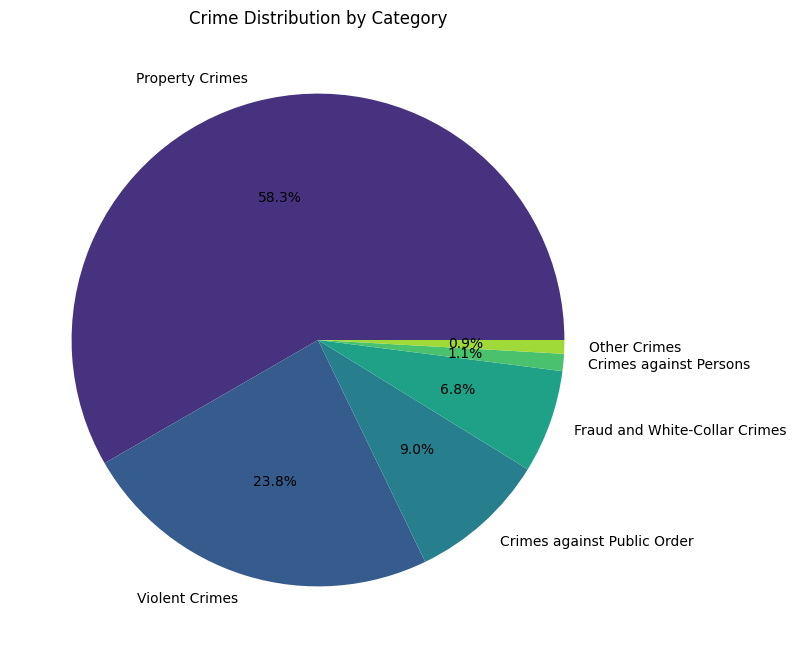

In [652]:
# Pie chart
plt.figure(figsize=(8, 8))
train['Crime_Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(train['Crime_Category'].unique())))
plt.title('Crime Distribution by Category')
plt.ylabel('')
plt.show()

Interpretations from the plot above :

- The frequency of "Property Crimes" is highest.
- The frequency of "Other Crimes" and " Crime Against Persons" is very low comapred to rest of the Crimes.

## 3.5 - Histogram

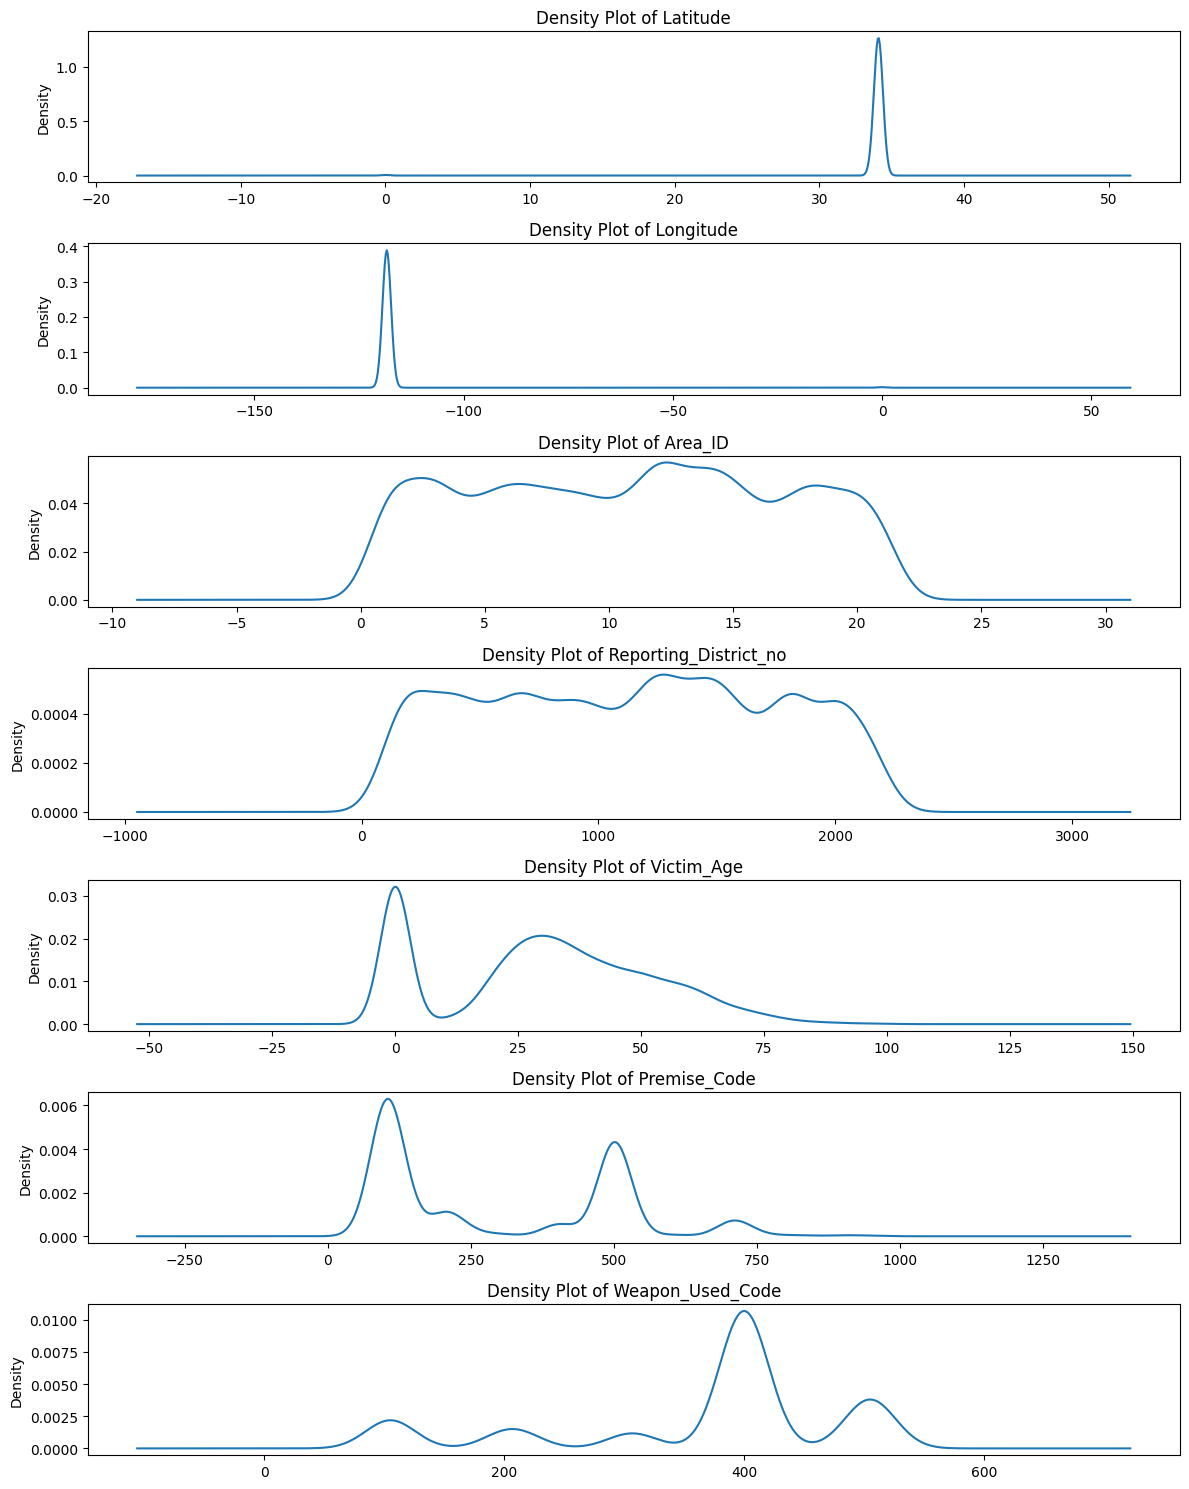

In [653]:
cols_to_plot = [
    'Latitude',
    'Longitude',
    'Area_ID',
    'Reporting_District_no',
    'Victim_Age',
    'Premise_Code',
    'Weapon_Used_Code'
]

# Density plot for each selected column
fig, axes = plt.subplots(nrows=len(cols_to_plot), figsize=(12, 15))
for i, col in enumerate(cols_to_plot):
    train[col].plot(kind='density', ax=axes[i])
    axes[i].set_title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()

<Axes: >

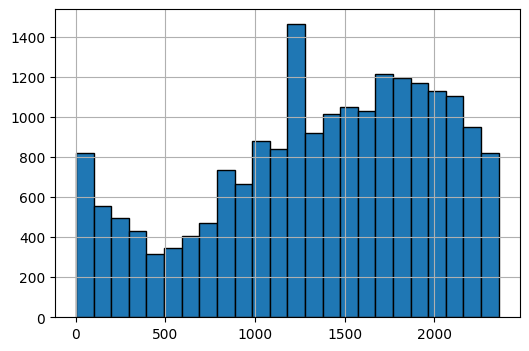

In [654]:
train["Time_Occurred"].hist(figsize=(6, 4), bins=24, edgecolor='black')

Interpretations from the histogram plot above :    
- The Latitude values are concentrated in a range around 30 degrees.
- The Longitude values are concentrated in a range around -100 degrees.
- There is a sudden rise in crimes in early after noon.
- The frequency of crime is also higher between the time interval 11:00 to 01:00.
- Crimes are more or less evenly distributed across Area ID. Same with Reporting District Number.
- There seems to be high count of Victim Age where Value is zero it could mean that the victim age is unkown.
- Most of the Victims lie in the range 20 to 60.
- The frequency of some Premise Codes are higher.
- The weapon with weapon code 400 (i.e. "STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)" according to it's Description) seems to be dominating.

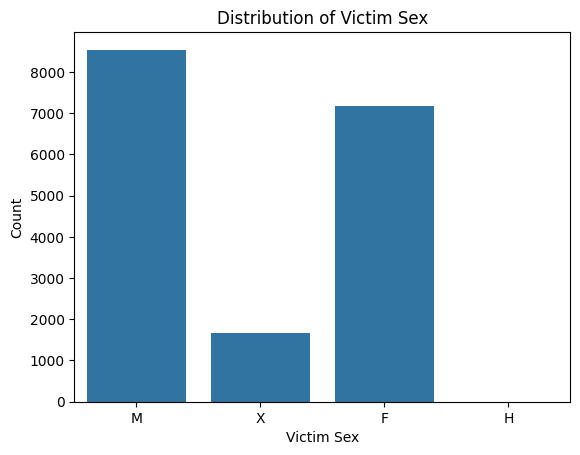

In [655]:
# Creating the count plot with labels and title in one line
sns.countplot(data=train, x='Victim_Sex').set(
    xlabel='Victim Sex', ylabel='Count', title='Distribution of Victim Sex'
)

# Displaying the plot
plt.show()

Interpretations from the plot above :
- The Male Victims are slightly more frequent than female victims.
- The other Victims are not that frequenlt.

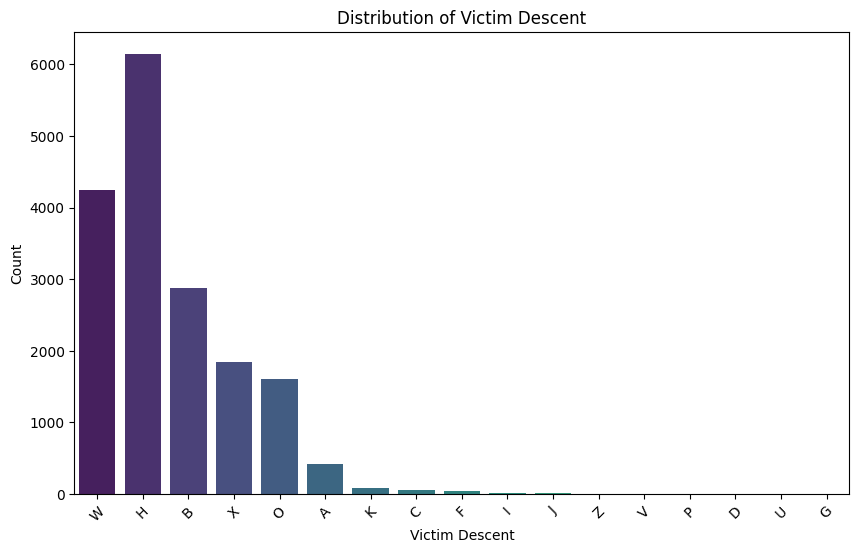

In [656]:
# Creating the count plot for Victim Descent
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Victim_Descent', hue='Victim_Descent', palette='viridis', legend=False)

# Adding labels and title
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.title('Distribution of Victim Descent')

# Displaying the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Interpretations from the plot above :
- The Victims against whom the crmies are commited more frequently have H, W, B, X, O, A as their descent.

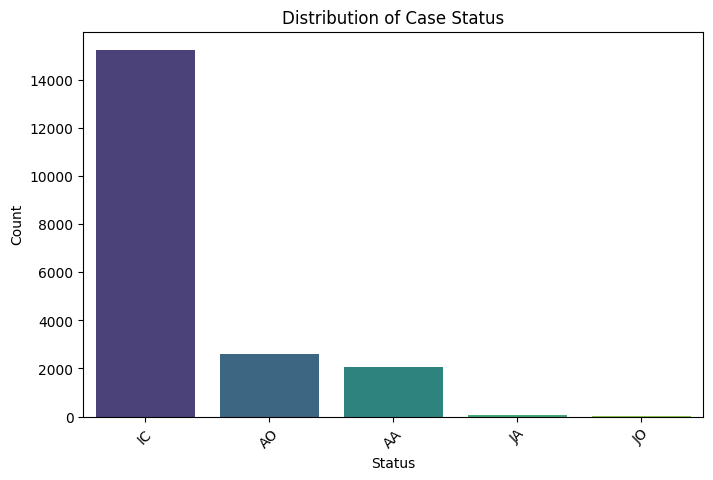

In [657]:
# Creating the count plot for Case Status
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='Status', hue='Status', palette='viridis', legend=False)

# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Case Status')

# Displaying the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


Interpretations from the above plot :
- The Status Code IC which means Investigation Continued is dominating implying majority of the crimes are not yet solved.

## Common Data For Correlation Matrix and Box Plot

- Converting some categorical columns to Numerical by label encoding them so that their correlation can be checked with some other important columns

In [658]:
le = LabelEncoder()
cce = pd.Series(le.fit_transform(train.Crime_Category))
vse = pd.Series(le.fit_transform(train.Victim_Sex))
vde = pd.Series(le.fit_transform(train.Victim_Descent))
se = pd.Series(le.fit_transform(train.Status))
e_train = pd.concat([train.drop(columns=['Crime_Category','Victim_Sex','Victim_Descent','Status']), cce], axis=1)
e_train.rename(columns={0: 'Crime_Category'}, inplace=True)
e_train = pd.concat([e_train, vse], axis=1)
e_train.rename(columns={0: 'Victim_Sex'}, inplace=True)
e_train = pd.concat([e_train, vde], axis=1)
e_train.rename(columns={0: 'Victim_Descent'}, inplace=True)
e_train = pd.concat([e_train, se], axis=1)
e_train.rename(columns={0: 'Status'}, inplace=True)

cols_to_plot = [
                'Latitude',
                'Longitude',
                'Time_Occurred',
                'Area_ID',
                'Reporting_District_no',
                'Victim_Age',
                'Victim_Sex',
                'Victim_Descent',
                'Premise_Code',
                'Weapon_Used_Code',
                'Part 1-2',
                'Status',
                'Crime_Category'
]

## 3.6 - Correlation Matrix

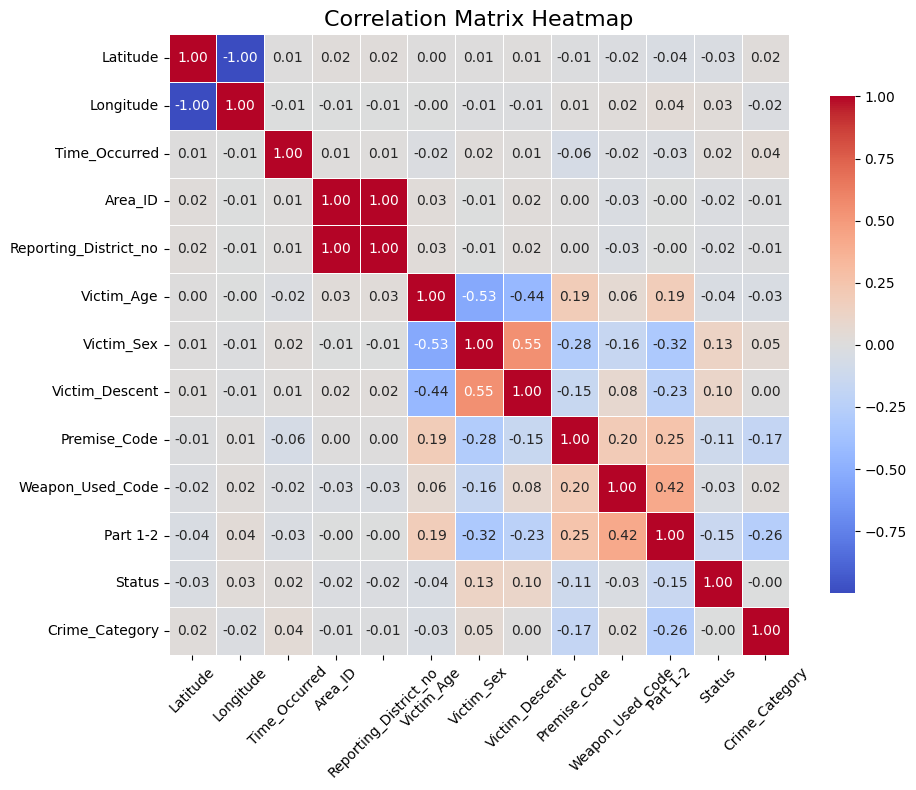

In [659]:
# correlation matrix
# Calculate the correlation matrix for the selected columns
corr_mat = e_train[cols_to_plot].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Adding titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to make room for labels

# Display the plot
plt.show()

Interpretations from the Correlation Matrix above :
- There is a correlation of 1 between the columns "Area_ID" and "Reporting_District_no" implying they carry identical data and we can try dropping one of the columns.
  - Tried Removing one of the columns from "Area_ID" or "Reporting_District_no", but doing so the accuracy for models didn't increase, it either remained same or decreased slightly. So After observing the changes I decided not to drop either of them.
- There is a weak positive correlation between "Premise_Code" and "Part 1-2" implying there might be some influence of premise code on whether a crime is classified as part 1 or part 2.
- Similarly there is also weak positive correlation between "Premise_Code" and "Weapon_Used_Code" imdicating the type of premise may have influence on weapon usage or type of weapon being used.
- There is a moderate positive correlation between "Weapon_Used_Code" and "Part 1-2" indicating that type of weapon might influence whether a crime is classified as part 1 or part 2.
- There seems to be no such columns which are correlated with "Crime_Category" implying it might not depend on a single factor and there could be multiple factors affecting the classification.

## 3.7 - Box Plots

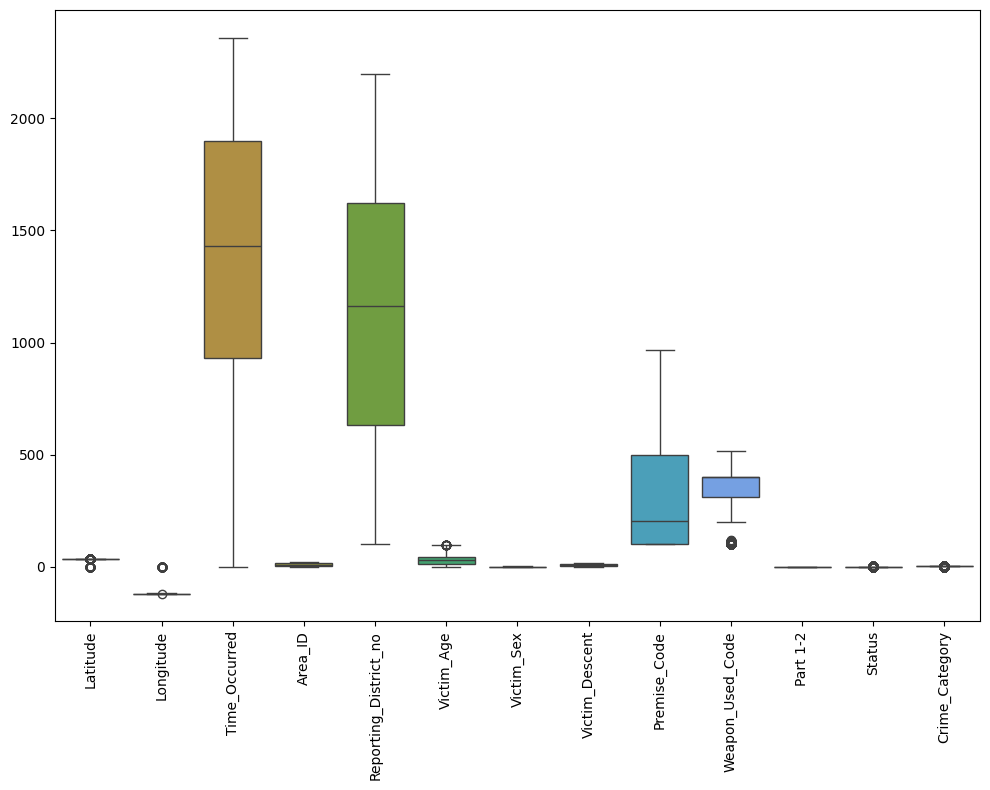

In [660]:
plt.figure(figsize=(10,8))
sns.boxplot(data=e_train[cols_to_plot])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Interpretations from the Box Plots above :
- There seems to be not outliers in the columns "Time_occured", "Reporting_District_no", "Victim_Sex", "Victim_Descent", "Premise_Code", "Part 1-2".
- There are outliers in the columns "Latitude", "Longitude", "Victim_Age", "Weapon_Used_Code", "Status", "Crime_Category".
- We can remove the outliers for better accuracy.
- Tried Removing the outliers and trained the models on it but keeping the outliers was giving slightly better accuracy so decided to train the models with keeping the outliers.


## 3.8 - Checking unique values for some columns in train and test data.

In [661]:
print(f"Unique values in Victim_Sex Column of Train data = {train.Victim_Sex.unique()}")
print(f"Unique values in Victim_Sex Column of Test data = {test.Victim_Sex.unique()}")

Unique values in Victim_Sex Column of Train data = ['M' 'X' 'F' nan 'H']
Unique values in Victim_Sex Column of Test data = ['F' 'M' nan 'X' 'H']


- The unique values present in the "Victim_Sex" column in both train and test data are same.

In [662]:
print(f"Unique values in Status Column of Train data = {train.Status.unique()}")
print(f"Unique values in Status Column of Test data = {test.Status.unique()}")

Unique values in Status Column of Train data = ['IC' 'AO' 'AA' 'JA' 'JO']
Unique values in Status Column of Test data = ['IC' 'AO' 'AA' 'JO' 'JA']


- The unique values present in the "Status" column in both train and test data are same.

In [663]:
print(f"Unique values in Victim_Descent Column of Train data = {train.Victim_Descent.unique()}")
print(f"Unique values in Victim_Descent Column of Test data = {test.Victim_Descent.unique()}")

Unique values in Victim_Descent Column of Train data = ['W' 'H' 'B' 'X' nan 'O' 'A' 'K' 'C' 'F' 'I' 'J' 'Z' 'V' 'P' 'D' 'U' 'G']
Unique values in Victim_Descent Column of Test data = ['H' 'B' nan 'W' 'Z' 'K' 'X' 'O' 'A' 'J' 'I' 'C' 'F' 'V' 'G' 'P' 'S']


- There are some unique values in "Victim_Descent" Column of train data which are not present in the unique values in "Victim_Descent" Column of test data.
- And similarly some unique values of "Victim_Descent" column of test data are not present in the unique values in "Victim_Descent" of train data.

In [664]:
print(f"Unique values in Crime_Category Column of Train data = {train.Crime_Category.unique()}")

Unique values in Crime_Category Column of Train data = ['Property Crimes' 'Violent Crimes' 'Other Crimes'
 'Crimes against Public Order' 'Fraud and White-Collar Crimes'
 'Crimes against Persons']


## 3.9 - Checking the data types of features in train and test data

In [665]:
train.dtypes

,0
Location,object
Cross_Street,object
Latitude,float64
Longitude,float64
Date_Reported,object
Date_Occurred,object
Time_Occurred,float64
Area_ID,float64
Area_Name,object
Reporting_District_no,float64


In [666]:
test.dtypes

,0
Location,object
Cross_Street,object
Latitude,float64
Longitude,float64
Date_Reported,object
Date_Occurred,object
Time_Occurred,float64
Area_ID,float64
Area_Name,object
Reporting_District_no,float64


- There are majorly two types of data present in the train and test data which are as follows :
  - Object
  - Float
- The columns with object type will be either dropped or converted into int or float types.
- The columns with float type will be scaled.

# 4. Handling Missing Data

- Checking the null values present in train and test data.

In [667]:
train.isna().sum()

,0
Location,0
Cross_Street,16552
Latitude,0
Longitude,0
Date_Reported,0
Date_Occurred,0
Time_Occurred,0
Area_ID,0
Area_Name,0
Reporting_District_no,0


In [668]:
test.isna().sum()

,0
Location,0
Cross_Street,4190
Latitude,0
Longitude,0
Date_Reported,0
Date_Occurred,0
Time_Occurred,0
Area_ID,0
Area_Name,0
Reporting_District_no,0


- Filling the null values with zeros in train and test data.

In [669]:
# Filling Null Values in Train Data
train = train.replace({None: np.nan, "": np.nan})
train = train.fillna(value=0)

# Filling Null Values in Test Data
test = test.replace({None: np.nan, "": np.nan})
test = test.fillna(value=0)

# 5. Pre-Processing

- After Filling the null values with zeros the null values in Victim_Sex column and Victim_Descent Column got replaced by 0 which is int type and the rest of the columns are of str type so while one hot encoding it will throw an error so I'll replace the 0's with a string "Unknown" for both the train set and test set.


In [670]:
# Converting for Train set
train['Victim_Sex'] = train['Victim_Sex'].apply(lambda x: "Unknown" if x==0 else x)
train['Victim_Descent'] = train['Victim_Descent'].apply(lambda x: "Unknown" if x==0 else x)

# Converting for Test set
test['Victim_Sex'] = test['Victim_Sex'].apply(lambda x: "Unknown" if x==0 else x)
test['Victim_Descent'] = test['Victim_Descent'].apply(lambda x: "Unknown" if x==0 else x)

In [1852]:
print(train.shape)
print(test.shape)

(20000, 22)
(5000, 21)


## 5.1 - Dropping Columns

- Dropping Some Categorical Columns Which Seemed Unnecessary.

In [671]:
# Dropping Columns from Train Data
train.drop(columns=['Location', 'Area_Name', 'Premise_Description', 'Weapon_Description', 'Status_Description'], axis=1, inplace=True)

# Dropping Columns from Test Data
test.drop(columns=['Location', 'Area_Name', 'Premise_Description', 'Weapon_Description', 'Status_Description'], axis=1, inplace=True)

## 5.2 - Converting Date Columns and Time Columns

- Converting the columns "Date_Reported" and "Date_Occurred" into proper datetime format so that we can do some operations on it.
- Creating a new column named "Report_Delay" which will have the time difference in days between the crime occurred and crime reported it can help us classify how severe the crime was depending upon how much delay there was in reporting the crime.

In [672]:
# Function for converting the Date Columns into proper date time format
def convert_date(x):
  x['Date_Reported'] = pd.to_datetime(x['Date_Reported'])
  x['Date_Occurred'] = pd.to_datetime(x['Date_Occurred'])
  return x

# Function for creating new column using date_reported and date_occurred columns
def create_report_delay(x):
  x['Report_delay'] = (x['Date_Reported'] - x['Date_Occurred']).dt.days
  return x

# Defining a pipeline to transform the dataset using the functions defined above
pipeline = Pipeline([
    ('convert_date', FunctionTransformer(convert_date, validate=False)),
    ('create_report_delay', FunctionTransformer(create_report_delay, validate=False))
])

# Transforming the train data
train = pipeline.fit_transform(train)

# Transforming the test data
test = pipeline.fit_transform(test)

<ipython-input-672-2a2356f5f685>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x['Date_Reported'] = pd.to_datetime(x['Date_Reported'])
<ipython-input-672-2a2356f5f685>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x['Date_Occurred'] = pd.to_datetime(x['Date_Occurred'])
<ipython-input-672-2a2356f5f685>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x['Date_Reported'] = pd.to_datetime(x['Date_Reported'])
<ipython-input-672-2a2356f5f685>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is

- Splitting The "Date_Reported" and "Date_Occurred" Columns into Day, Month, Year, WeekDay, DayOftheYear

In [673]:
# Splitting The Day_Occurred Column into sub columns in train data.
train['Day_Occurred'] = train['Date_Occurred'].dt.day
train['Month_Occurred'] = train['Date_Occurred'].dt.month
train['Year_Occurred'] = train['Date_Occurred'].dt.year
train['DOY_Occurred'] = train['Date_Occurred'].dt.day_of_year
train['Week_Occurred'] = train['Date_Occurred'].dt.weekday

# Splitting the Day_Reported Column into Sub Columns in train data.
train['Day_Reported'] = train['Date_Reported'].dt.day
train['Month_Reported'] = train['Date_Reported'].dt.month
train['Year_Reported'] = train['Date_Reported'].dt.year
train['DOY_Reported'] = train['Date_Reported'].dt.day_of_year
train['Week_Reported'] = train['Date_Reported'].dt.weekday

# Splitting The Day_Occurred Column into sub columns in test data.
test['Day_Occurred'] = test['Date_Occurred'].dt.day
test['Month_Occurred'] = test['Date_Occurred'].dt.month
test['Year_Occurred'] = test['Date_Occurred'].dt.year
test['DOY_Occurred'] = test['Date_Occurred'].dt.day_of_year
test['Week_Occurred'] = test['Date_Occurred'].dt.weekday

# Splitting the Day_Reported Column into Sub Columns in test data.
test['Day_Reported'] = test['Date_Reported'].dt.day
test['Month_Reported'] = test['Date_Reported'].dt.month
test['Year_Reported'] = test['Date_Reported'].dt.year
test['DOY_Reported'] = test['Date_Reported'].dt.day_of_year
test['Week_Reported'] = test['Date_Reported'].dt.weekday

- Dropping the original Date Columns from train and test as we have now splitted them into sub columns.

In [674]:
# Dropping the Date_Reported and Date_Occurred Columns from Train data
train.drop(columns=['Date_Reported','Date_Occurred'],inplace=True)

# Dropping the Date_Reported and Date_Occurred Columns from Test data
test.drop(columns=['Date_Reported','Date_Occurred'],inplace=True)

- Defining functions for splitting the Time column into hour and minute

In [675]:
# Function for extracting the hours from the military time of Time_Occurred Column
def hour(time):
  time_str = f"{time:04d}"
  hours = time_str[:2]
  return hours

# Function for extracting the minutes from the military time of Time_Occurred Column
def minute(time):
  time_str = f"{time:04d}"
  minute = time_str[2:]
  return minute

- Splitting the Time_Occurred Column into sub columns

In [676]:
# Converting the time_occurred column in train data into int type so that we can apply the fuction
train['Time_Occurred'] = train['Time_Occurred'].astype(int)

# Splitting the Time column into hour and minute using the function in train data
train['Hour_Occurred'] = train['Time_Occurred'].apply(hour)
train['Minute_Occurred'] = train['Time_Occurred'].apply(minute)

# Converting the splitted sub columns in train data back to int type because after applying the fucntion they got converted into str type
train['Hour_Occurred'] = train['Hour_Occurred'].astype(int)
train['Minute_Occurred'] = train['Minute_Occurred'].astype(int)


# Converting the time_occurred column in test data into int type so that we can apply the fuction
test['Time_Occurred'] = test['Time_Occurred'].astype(int)

# Splitting the Time column into hour and minute using the function in test data
test['Hour_Occurred'] = test['Time_Occurred'].apply(hour)
test['Minute_Occurred'] = test['Time_Occurred'].apply(minute)

# Converting the splitted sub columns in test data back to int type because after applying the fucntion they got converted into str type
test['Hour_Occurred'] = test['Hour_Occurred'].astype(int)
test['Minute_Occurred'] = test['Minute_Occurred'].astype(int)

- Dropping the Time Columns from train and test as we have splitted them into sub columns.

In [677]:
# Dropping the Time_Occurred Column from train data
train.drop(columns=['Time_Occurred'],inplace=True)

# Dropping the Time_Occurred Column from test data
test.drop(columns=['Time_Occurred'],inplace=True)

In [678]:
print(train.shape)
print(test.shape)

(20000, 27)
(5000, 26)


## 5.3 - Handling the outliers

- Victim_Age Column had some values which were less than zero therefore converting them to 0.

In [679]:
# Doing Conversion in train data
train['Victim_Age'] = train['Victim_Age'].apply(lambda x: 0 if x < 0 else x)

# Doing Conversion in test data
test['Victim_Age'] = test['Victim_Age'].apply(lambda x: 0 if x < 0 else x)

- There were so many missing values in the column Cross_Street, initially I dropped this column as well but keeping this column resulted in slightly better accuracy so keeping this column by coverting this column into boolean, If there is value for cross street then it will have 1 otherwise 0.

In [680]:
# Doing the conversion in train data
train['Cross_Street'] = train['Cross_Street'].apply(lambda x: 1 if x != 0 else x)
train['Cross_Street'] = train['Cross_Street'].astype(int)

# Doing the conversion in train data
test['Cross_Street'] = test['Cross_Street'].apply(lambda x: 1 if x != 0 else x)
test['Cross_Street'] = test['Cross_Street'].astype(int)

In [681]:
print(train.shape)
print(test.shape)

(20000, 27)
(5000, 26)


## 5.4 - Scaling and encoding

- Common Code of column transformer that will be used for transforming train and test set.

In [682]:
# Creating a list of numerical columns to be passed in the column transformer
num_cols = ['Cross_Street', 'Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no','Victim_Age', 'Premise_Code',
            'Weapon_Used_Code','Report_delay','Day_Occurred','Month_Occurred', 'Year_Occurred',
            'DOY_Occurred', 'Week_Occurred','Day_Reported', 'Month_Reported', 'Year_Reported',
            'DOY_Reported','Week_Reported', 'Hour_Occurred', 'Minute_Occurred']

# Creating a list of categorical columns to be passed in the column transformer
cat_cols = ['Part 1-2', 'Victim_Sex', 'Victim_Descent', 'Status']

# Defining a Column Transformer to scale the numerical columns in the dataset and Encode the categorical columns in the dataset
col_trans = ColumnTransformer([
    ('scalar', MinMaxScaler(), num_cols),
    ('ohe', OneHotEncoder(), cat_cols)
])

- Transforming Train set

In [683]:
# Trnasforming the train data and storing it into another variable
train_transformed = col_trans.fit_transform(train)
col_names_train = col_trans.get_feature_names_out()

# A small for loop to clean the column names as column transformer adds some unwanted prefix in column names
ccn_train = []
for col_name in col_names_train:
  if "__" in col_name:
    cn = col_name.split("__")[1]
    ccn_train.append(cn)
  else:
    ccn_train.append(col_name)

# converting the transformed columns into dataframe so that it can be concatinated with the main train data
train_transformed = pd.DataFrame(train_transformed, columns=ccn_train)

# concatinating the train data and transformed data
train = pd.concat([train.drop(columns=num_cols+cat_cols), train_transformed], axis=1)

- Transforming Test Set

In [684]:
# Trnasforming the test data and storing it into another variable
test_transformed = col_trans.fit_transform(test)
col_names_test = col_trans.get_feature_names_out()

# A small for loop to clean the column names as column transformer adds some unwanted prefix in column names
ccn_test = []
for col_name in col_names_test:
  if "__" in col_name:
    cn = col_name.split("__")[1]
    ccn_test.append(cn)
  else:
    ccn_test.append(col_name)

# converting the transformed columns into dataframe so that it can be concatinated with the main test data
test_transformed = pd.DataFrame(test_transformed, columns=ccn_test)

# concatinating the test data and transformed data
test = pd.concat([test.drop(columns=num_cols+cat_cols), test_transformed], axis=1)

# 6. Feature Engineering

- Handling the Modus_Operandi Column by applying Multilabel Binarizer.

In [685]:
# Handling on train data
# Converting the column into string as some values were int type
train['Modus_Operandi'] = train['Modus_Operandi'].astype(str)
# Splitting the string by space to convert it into a list so that Multilabel Binarizer can be applied
train['Modus_Operandi'] = train['Modus_Operandi'].apply(lambda x: x.split())


# Handling on Test Data
# Converting the column into string as some values were int type
test['Modus_Operandi'] = test['Modus_Operandi'].astype(str)
# Splitting the string by space to convert it into a list so that Multilabel Binarizer can be applied
test['Modus_Operandi'] = test['Modus_Operandi'].apply(lambda x: x.split())

- Applying MultiLabelBinarizer on the Column

In [686]:
mlb = MultiLabelBinarizer()

# Applying on Train data
modus_encoded = mlb.fit_transform(train['Modus_Operandi'])
modus_encoded_train = pd.DataFrame(modus_encoded, columns=mlb.classes_)
# Setting their index same because wihtout setting it same there were index mismatch while concatinating
modus_encoded_train.index = train.index
train = pd.concat([train, modus_encoded_train], axis=1)

# Applying on Test data
me = mlb.fit_transform(test['Modus_Operandi'])
modus_encoded_test = pd.DataFrame(me, columns=mlb.classes_)
# Setting their index same because wihtout setting it same there were index mismatch while concatinating
modus_encoded_test.index = test.index
test = pd.concat([test, modus_encoded_test], axis=1)

- Dropping the Modus_Operandi Column as we have now successfully applied MultiLabelBinarizer on it.

In [687]:
# Dropping from Train data
train.drop(columns=['Modus_Operandi'],inplace=True)

# Dropping from Test data
test.drop(columns=['Modus_Operandi'],inplace=True)

- There might be some columns missing in train data which are present in test data and similarly there might be some columns missing in test data which are present in train data.
- Running a small for loop and initializing the values as 0 for the missing columns in train and test.

In [688]:
# Creating a set of missing columns in test which are present in train
missing_cols_in_test = set(train.columns) - set(test.columns)

# Creating a set of missing columns in train which are present in test
missing_cols_in_train = set(test.columns) - set(train.columns)

# Running a loop for creating the missing columns in test and initialising the value to 0.
for col in missing_cols_in_test:
    test[col] = 0

# Running a loop for creating the missing columns in train and initialising the value to 0.
for col in missing_cols_in_train:
  train[col] = 0

<ipython-input-688-c316d2b8f1d3>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[col] = 0
<ipython-input-688-c316d2b8f1d3>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[col] = 0
<ipython-input-688-c316d2b8f1d3>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[col] = 0
<ipython-inpu

- Setting the column order same for both train and test.

In [689]:
# Storing the column order of train in a variable
col_order = train.columns

# creating a new variable in which and setting it to test wihich is having the column order of train data.
f_test = test[col_order]

- Dropping the Crime_Category column from test becasue it was a missing column in test data and it also got created when we ran the for loop.

In [690]:
f_test.drop(columns=['Crime_Category'],inplace=True)

<ipython-input-690-ff812ae6752a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_test.drop(columns=['Crime_Category'],inplace=True)


In [691]:
print(f"Train Data Shape : {train.shape}")
print(f"Test Data Shape : {f_test.shape}")

Train Data Shape : (20000, 553)
Test Data Shape : (5000, 552)


# 7. Model Building

- Splitting the train data into x and y.
- X will have all the features except the target feature.
- Y will have only the target feature.

In [692]:
x = train.drop(columns=['Crime_Category'])
y = train['Crime_Category']

- Splitting the training data further into x_train, x_test and y_train, y_test so that we can check the acuracy of the model being trained.

In [693]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## 7.1 - Ridge Classifier

In [694]:
rc = RidgeClassifier(random_state=0)
rc.fit(x_train,y_train)
y_pred_rc = rc.predict(x_test)
accuracy_rc = accuracy_score(y_test, y_pred_rc)
print(accuracy_rc)

# Score = 0.921

0.921


In [695]:
# report = classification_report(y_test, y_pred_rc)
# print(report)

- Classification Report

```
                               precision    recall  f1-score   support

       Crimes against Persons       0.69      0.44      0.54        41
  Crimes against Public Order       0.79      0.73      0.76       344
Fraud and White-Collar Crimes       0.92      0.86      0.89       274
                 Other Crimes       0.00      0.00      0.00        38
              Property Crimes       0.96      0.97      0.97      2386
               Violent Crimes       0.88      0.93      0.91       917

                     accuracy                           0.92      4000
                    macro avg       0.71      0.66      0.68      4000
                 weighted avg       0.91      0.92      0.92      4000
```

### 7.1.1 - Ridge Classifier With PCA

In [696]:
# ridge_pipe = Pipeline([
#                         ('pca', PCA(n_components=0.99)),
#                         ('rc', rc)
# ])

# ridge_pipe.fit(x_train,y_train)
# y_pred_ridge_pipe = ridge_pipe.predict(x_test)
# acc_ridge_pipe = accuracy_score(y_test, y_pred_ridge_pipe)
# print(acc_ridge_pipe)

# Score = 0.92

### 7.1.2 - Ridge Classifier with Hyper Parameter Tuning

In [697]:
# pg_ridge = {
#     'rc__alpha': [0.1, 1],
#     'rc__max_iter': [1000, 2000],
#     'rc__tol': [1e-5, 1e-4, 1e-3],
#     'rc__solver': ['lsqr','saga', 'sparse_cg']
# }

# random_cv = RandomizedSearchCV(estimator=ridge_pipe, param_distributions=pg_ridge, n_iter=20, cv=3, n_jobs=-1, verbose=2)
# random_cv.fit(x_train, y_train)
# print(f"train score = {random_cv.best_score_}")
# y_pred_ridge_rcv = random_cv.best_estimator_.predict(x_test)
# acc_ridge_rcv = accuracy_score(y_test, y_pred_ridge_rcv)
# print(f"test score = {acc_ridge_rcv}")

# Score = 0.92


- Ridge Classifier Gave best Result with default values of it's parameters.

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.921                     | 0.920          | 0.920
```

## 7.2 - LogisticRegression

In [698]:
# lr = LogisticRegression(random_state=0)
# lr.fit(x_train,y_train)
# y_pred_lr = lr.predict(x_test)
# accuracy_lr = accuracy_score(y_test, y_pred_lr)
# print(accuracy_lr)

# Score = 0.945

In [699]:
# report = classification_report(y_test, y_pred_lr)
# print(report)

- Classification Report

```
                               precision    recall  f1-score   support

         Crimes against Persons       0.65      0.49      0.56        41
    Crimes against Public Order       0.82      0.82      0.82       344
  Fraud and White-Collar Crimes       0.92      0.95      0.94       274
                   Other Crimes       0.45      0.13      0.20        38
                Property Crimes       0.98      0.98      0.98      2386
                 Violent Crimes       0.92      0.94      0.93       917

                       accuracy                           0.94      4000
                      macro avg       0.79      0.72      0.74      4000
                   weighted avg       0.94      0.94      0.94      4000
```


### 7.2.1 - Logistic Regression with PCA

In [700]:
# logReg_pipe = Pipeline([
#           ('pca', PCA(n_components=0.99)),
#           ('lr', lr)
# ])

# logReg_pipe.fit(x_train, y_train)
# y_pred_logReg = logReg_pipe.predict(x_test)
# acc_lrpipe = accuracy_score(y_test, y_pred_logReg)
# print(acc_lrpipe)

# Score = 0.94475

### 7.2.2 - Logistic Regression with Hyper Parameter Tuning

In [701]:
# pg_logReg = {
#     'lr__C' : [0.001, 1000],
#     'lr__penalty' : ['l1', 'l2'],
#     'lr__solver' : ['lbfgs', 'newton-cg', 'liblinear'],
#     'lr__max_iter' : [100,200],
#     'lr__class_weight' : [None, 'balanced']
# }

# random_cv = RandomizedSearchCV(estimator=logReg_pipe, param_distributions=pg_logReg, n_iter=20, cv=3, n_jobs=-1, verbose=2)
# random_cv.fit(x_train, y_train)
# y_pred_logReg_rcv = random_cv.best_estimator_.predict(x_test)
# acc_logReg_rcv = accuracy_score(y_test, y_pred_logReg_rcv)
# print(f"test score = {acc_logReg_rcv}")

# Score = 0.9435

- Logistic Regression gave best result with default values of it's parameters

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.945                     | 0.94475        | 0.9435
```

## 7.3 - GradientBoostingClassifier

In [702]:
# gb = GradientBoostingClassifier(random_state=0)
# gb.fit(x_train, y_train)
# y_pred_gb = gb.predict(x_test)
# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# print(accuracy_gb)

# Score = 0.95275

In [703]:
# report = classification_report(y_test, y_pred_gb)
# print(report)

- Classification Report

```
                               precision    recall  f1-score   support

       Crimes against Persons       0.62      0.59      0.60        41
  Crimes against Public Order       0.82      0.85      0.83       344
Fraud and White-Collar Crimes       0.96      0.93      0.94       274
                 Other Crimes       0.45      0.24      0.31        38
              Property Crimes       0.99      0.99      0.99      2386
               Violent Crimes       0.93      0.96      0.94       917

                     accuracy                           0.95      4000
                    macro avg       0.79      0.76      0.77      4000
                 weighted avg       0.95      0.95      0.95      4000

```

### 7.3.1 - Gradient Boosting Classifier with PCA

In [704]:
# gb_pipe = Pipeline([
#         ('pca', PCA(n_components=0.99)),
#         ('gb',gb)
# ])

# gb_pipe.fit(x_train, y_train)
# y_pred_gb_pipe = gb_pipe.predict(x_test)
# acc_gb_pipe = accuracy_score(y_test, y_pred_gb_pipe)
# print(f"test score = {acc_gb_pipe}")

# Score = 0.9345

### 7.3.2 - Gradient Boosting Classifier with Hyper Parameter Tuning

In [705]:
# pg_gb = {
#     'n_estimators': [100, 500],
#     'learning_rate': [0.01, 0.1],
#     'max_depth': [3, 7],
#     'min_samples_split': [2, 10],
#     'subsample': [0.8, 1.0]
# }

# random_cv = RandomizedSearchCV(estimator=gb, param_distributions=pg_gb, n_iter=5, cv=3, n_jobs=-1, verbose=2)
# random_cv.fit(x_train, y_train)
# y_pred_gb_rcv = random_cv.best_estimator_.predict(x_test)
# acc_gb_rcv = accuracy_score(y_test, y_pred_gb_rcv)
# print(f"test score = {acc_gb_rcv}")

# Score = 0.944

- Gradient Boosting Classifier gave best result with default values of it's parameters

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.95275                   | 0.9345         | 0.944
```

## 7.4 - RandomForestClassifier


In [706]:
# rf = RandomForestClassifier(random_state=0)
# rf.fit(x_train, y_train)
# y_pred_rf = rf.predict(x_test)
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print(accuracy_rf)

# Score = 0.94975

In [707]:
# report = classification_report(y_test, y_pred_rf)
# print(report)

- Classification Report

```
                               precision    recall  f1-score   support

       Crimes against Persons       0.88      0.37      0.52        41
  Crimes against Public Order       0.86      0.78      0.82       344
Fraud and White-Collar Crimes       0.92      0.96      0.94       274
                 Other Crimes       0.33      0.03      0.05        38
              Property Crimes       0.99      0.99      0.99      2386
               Violent Crimes       0.90      0.97      0.94       917

                     accuracy                           0.95      4000
                    macro avg       0.81      0.68      0.71      4000
                 weighted avg       0.94      0.95      0.94      4000

```

### 7.4.1 - Random Forest Classifier with PCA

In [708]:
# rf_pipe = Pipeline([
#     ('pca', PCA(n_components=0.99)),
#     ('rf', rf)
# ])

# rf_pipe.fit(x_train, y_train)
# y_pred_rf_pipe = rf_pipe.predict(x_test)
# acc_rf_pipe = accuracy_score(y_test, y_pred_rf_pipe)
# print(acc_rf_pipe)

# Score = 0.92125

### 7.4.2 - Random Forest Classifier with Hyper Parameter Tuning

In [709]:
# pg_rf = {
#     'n_estimators': [100, 500],
#     'max_depth': [10, None],
#     'min_samples_split': [2, 10],
#     'min_samples_leaf': [1, 5],
#     'max_features': ['sqrt', 'log2']
# }

# random_cv = RandomizedSearchCV(estimator=rf, param_distributions=pg_rf, n_iter=10, cv=5, verbose=2, random_state=0, n_jobs=-1)
# random_cv.fit(x_train, y_train)
# y_pred_rf_rcv = random_cv.best_estimator_.predict(x_test)
# acc_rf_rcv = accuracy_score(y_test, y_pred_rf_rcv)
# print(acc_rf_rcv)

# Score = 0.94975

- Random Forest Classifier gave same results with default values of it's parameters and after Hyper Parameter Tuning Both.

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.94975                   | 0.92125        | 0.94975
```

## 7.5 - DecisionTreeClassifier

In [710]:
# dtc = DecisionTreeClassifier(random_state=42)
# dtc.fit(x_train, y_train)
# y_pred_dtc = dtc.predict(x_test)
# accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
# print(accuracy_dtc)

# Score = 0.936

In [711]:
# report = classification_report(y_test, y_pred_dtc)
# print(report)

- Classification Report

```
                               precision    recall  f1-score   support

       Crimes against Persons       0.56      0.61      0.58        41
  Crimes against Public Order       0.80      0.79      0.79       344
Fraud and White-Collar Crimes       0.91      0.89      0.90       274
                 Other Crimes       0.31      0.37      0.34        38
              Property Crimes       0.98      0.98      0.98      2386
               Violent Crimes       0.92      0.92      0.92       917

                     accuracy                           0.94      4000
                    macro avg       0.75      0.76      0.75      4000
                 weighted avg       0.94      0.94      0.94      4000

```

### 7.5.1 - Decision Tree Classifier with PCA

In [712]:
# dtc_pipe = Pipeline([
#     ('pca', PCA(n_components=0.99)),
#     ('dtc', dtc)
# ])

# dtc_pipe.fit(x_train, y_train)
# y_pred_dtc_pipe = dtc_pipe.predict(x_test)
# acc_dtc_pipe = accuracy_score(y_test, y_pred_dtc_pipe)
# print(acc_dtc_pipe)

# Score = 0.87225

### 7.5.2 - Decision Tree Classifier with Hyper Parameter Tuning

In [713]:
# pg_dtc = {
#     'max_depth': [10, 20, 50],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features': ['sqrt', 'log2'],
#     'criterion': ['gini', 'entropy', 'log_loss']
# }

# random_cv = RandomizedSearchCV(estimator=dtc, param_distributions=pg_dtc, n_jobs=-1, cv=5, n_iter=20, random_state=0, verbose=2)
# random_cv.fit(x_train,y_train)
# y_pred_dtc_rcv = random_cv.best_estimator_.predict(x_test)
# acc_dtc_rcv = accuracy_score(y_test, y_pred_dtc_rcv)
# print(acc_dtc_rcv)

# Score = 0.89075

- Decision Tree Classifier gave best results with default values of it's parameters.

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.936                     | 0.87225        | 0.89075
```

## 7.6 - SGDClassifier

In [714]:
# sgd = SGDClassifier(random_state=0)
# sgd.fit(x_train, y_train)
# y_pred_sgd = sgd.predict(x_test)
# asgd = accuracy_score(y_test, y_pred_sgd)
# print(asgd)

# Score = 0.945

In [715]:
# report = classification_report(y_test, y_pred_sgd)
# print(report)

- Classification Report

```
                               precision    recall  f1-score   support

       Crimes against Persons       0.73      0.46      0.57        41
  Crimes against Public Order       0.81      0.83      0.82       344
Fraud and White-Collar Crimes       0.95      0.94      0.94       274
                 Other Crimes       0.40      0.05      0.09        38
              Property Crimes       0.98      0.98      0.98      2386
               Violent Crimes       0.91      0.95      0.93       917

                     accuracy                           0.94      4000
                    macro avg       0.80      0.70      0.72      4000
                 weighted avg       0.94      0.94      0.94      4000

```

### 7.6.1 - SGD Classifier with PCA

In [716]:
# sgd_pipe = Pipeline([
#     ('pca',PCA(n_components=0.99)),
#     ('sgd',sgd)
# ])

# sgd_pipe.fit(x_train, y_train)
# y_pred_sgd_pipe = sgd_pipe.predict(x_test)
# acc_sgd_pipe = accuracy_score(y_test, y_pred_sgd_pipe)
# print(acc_sgd_pipe)

# Score = 0.94325

### 7.6.2 - SGD Classifier with Hyper Parameter Tuning

In [717]:
# pg_sgd = {
#     'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
#     'eta0': [0.01, 0.1, 0.5],
#     'alpha': [0.0001, 0.01],
#     'max_iter': [1000, 5000],
#     'penalty': ['l2', 'l1']
# }

# random_cv = RandomizedSearchCV(estimator=sgd, param_distributions=pg_sgd, cv=5, n_iter=10, verbose=2, random_state=0, scoring='accuracy')
# random_cv.fit(x_train,y_train)
# y_pred_sgd_rcv = random_cv.best_estimator_.predict(x_test)
# acc_sgd_rcv = accuracy_score(y_test, y_pred_sgd_rcv)
# print(acc_sgd_rcv)

# Score = 0.94025

- SGD Classifier gave best results with default values of it's parameters.

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.945                     | 0.94325        | 0.94025
```

## 7.7 - BaggingClassifier

In [718]:
# bc = BaggingClassifier(random_state=0)
# bc.fit(x_train, y_train)
# yp_bc = bc.predict(x_test)
# a_bc = accuracy_score(y_test, yp_bc)
# print(a_bc)

# Score = 0.95125

In [719]:
# report = classification_report(y_test, yp_bc)
# print(report)

- Classification Report

```
                               precision    recall  f1-score   support

       Crimes against Persons       0.57      0.59      0.58        41
  Crimes against Public Order       0.80      0.89      0.84       344
Fraud and White-Collar Crimes       0.94      0.92      0.93       274
                 Other Crimes       0.53      0.21      0.30        38
              Property Crimes       0.99      0.99      0.99      2386
               Violent Crimes       0.94      0.94      0.94       917

                     accuracy                           0.95      4000
                    macro avg       0.79      0.76      0.76      4000
                 weighted avg       0.95      0.95      0.95      4000

```

### 7.7.1 - Bagging Classifier with PCA

In [720]:
# bc_pipe = Pipeline([
#     ('pca',PCA(n_components=0.99)),
#     ('bc',bc)
# ])

# bc_pipe.fit(x_train, y_train)
# y_pred_bc_pipe = bc_pipe.predict(x_test)
# acc_bc_pipe = accuracy_score(y_test, y_pred_bc_pipe)
# print(acc_bc_pipe)

# Score = 0.91475

### 7.7.2 - Bagging Classifier with Hyper Parameter Tuning

In [721]:
# pg_bc = {
#     'n_estimators': [50, 100, 200],
#     'max_samples': [0.5, 0.8, 1.0],
#     'max_features': [0.5, 0.8, 1.0],
#     'bootstrap': [True, False],
#     'bootstrap_features': [True, False],
#     'oob_score': [True, False]
# }

# random_cv = RandomizedSearchCV(estimator=bc, param_distributions=pg_bc, cv=5, n_iter=10, verbose=3, random_state=0, n_jobs=-1, scoring='accuracy')
# random_cv.fit(x_train,y_train)
# y_pred_bc_rcv = random_cv.best_estimator_.predict(x_test)
# acc_bc_rcv = accuracy_score(y_test, y_pred_bc_rcv)

# Score = 0.95425

- Bagging Classifier gave best results with it's parameters tuned.

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.95125                   | 0.91475        | 0.95425
```

## 7.8 - ExtraTreesClassifier

In [722]:
# etc = ExtraTreesClassifier(random_state=0)
# etc.fit(x_train, y_train)
# ypetc = etc.predict(x_test)
# aetc = accuracy_score(y_test, ypetc)
# print(aetc)

# Score = 0.95275

In [723]:
# report = classification_report(y_test, ypetc)
# print(report)

- Classification Report

```
                               precision    recall  f1-score   support

       Crimes against Persons       0.82      0.34      0.48        41
  Crimes against Public Order       0.82      0.82      0.82       344
Fraud and White-Collar Crimes       0.94      0.93      0.94       274
                 Other Crimes       0.83      0.13      0.23        38
              Property Crimes       0.99      0.99      0.99      2386
               Violent Crimes       0.90      0.97      0.94       917

                     accuracy                           0.95      4000
                    macro avg       0.89      0.70      0.73      4000
                 weighted avg       0.95      0.95      0.95      4000

```

### 7.8.1 - Extra Tree Classifier with PCA

In [724]:
# etc_pipe = Pipeline([
#     ('pca',PCA(n_components=0.99)),
#     ('etc',etc)
# ])

# etc_pipe.fit(x_train, y_train)
# y_pred_etc_pipe = etc_pipe.predict(x_test)
# acc_etc_pipe = accuracy_score(y_test, y_pred_etc_pipe)
# print(acc_etc_pipe)

# Score = 0.9275

### 7.8.2 - Extra Tree Classifier with Hyper Parameter Tuning

In [725]:
# pg_etc = {
#     'n_estimators': [50, 200, 500],
#     'max_depth': [None, 10, 50],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features': ['sqrt', 0.5, None]
# }
# random_cv = RandomizedSearchCV(estimator=etc, param_distributions=pg_etc, cv=3, n_iter=10, verbose=2, n_jobs=-1, random_state=0, scoring='accuracy')
# random_cv.fit(x_train, y_train)
# y_pred_etc_rcv = random_cv.best_estimator_.predict(x_test)
# acc_etc_rcv = accuracy_score(y_test, y_pred_etc_rcv)
# print(acc_etc_rcv)

# Score = 0.95275

- Extra Tree Classifier gave same results with it's parameters values as default and with its hyper parameters tuned.

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.95275                   | 0.9275         | 0.95275
```

## 7.9 - XGBClassifier

In [726]:
# label_encoder = LabelEncoder()
# ye_train = pd.Series(label_encoder.fit_transform(y_train))
# ye_test = pd.Series(label_encoder.fit_transform(y_test))

# xgbc = xgb.XGBClassifier(random_state=0)
# xgbc.fit(x_train, ye_train)
# yp_xgbc = xgbc.predict(x_test)
# acc = accuracy_score(ye_test, yp_xgbc)
# print(acc)

# Score = 0.95675

In [727]:
# for i in range(len(label_encoder.classes_)):
#   print(f"{i} = {label_encoder.classes_[i]}")

In [728]:
# report = classification_report(ye_test, yp_xgbc)
# print(report)

- Classification Report

```
                                   precision    recall  f1-score   support

           Crimes against Persons       0.68      0.61      0.64        41
      Crimes against Public Order       0.84      0.88      0.86       344
    Fraus and White-Collar Crimes       0.95      0.96      0.95       274
                     Other Crimes       0.54      0.18      0.27        38
                  Property Crimes       0.99      0.99      0.99      2386
                   Violent Crimes       0.93      0.96      0.94       917

                         accuracy                           0.96      4000
                        macro avg       0.82      0.76      0.78      4000
                     weighted avg       0.95      0.96      0.95      4000

```

### 7.9.1 - XGBoost Classifier with PCA

In [729]:
# xgb_pipe = Pipeline([
#     ('pca',PCA(n_components=0.99)),
#     ('xgb',xgbc)

# ])

# xgb_pipe.fit(x_train, ye_train)
# y_pred_xgb_pipe = xgb_pipe.predict(x_test)
# acc_xgb_pipe = accuracy_score(ye_test, y_pred_xgb_pipe)
# print(acc_xgb_pipe)

#Score = 0.9495

### 7.9.2 - XGBoost Classifier with Hyper Parameter Tuning

In [730]:
# pg_xgb = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'max_depth': [3, 6, 10],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'gamma': [0, 0.1, 1]
# }

# random_cv = RandomizedSearchCV(estimator=xgbc, param_distributions=pg_xgb, cv=3, n_iter=5, verbose=2, n_jobs=-1, scoring='accuracy', random_state=0)
# random_cv.fit(x_train, ye_train)
# y_pred_xgb_rcv = random_cv.best_estimator_.predict(x_test)
# acc_xgb_rcv = accuracy_score(ye_test, y_pred_xgb_rcv)
# print(acc_xgb_rcv)

# Score = 0.9565

- XGBoost Classifier gave best result with it's parameters values as default.

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.95675                   | 0.9495         | 0.9565
```

## 7.10 - LightGBMClassifier

In [731]:
# lgbc = lgb.LGBMClassifier(random_state=42)
# lgbc.fit(x_train, y_train)
# yp_lgbc = lgbc.predict(x_test)
# acc_lgbc = accuracy_score(y_test, yp_lgbc)
# print(acc_lgbc)

# Score = 0.95775

In [732]:
# report = classification_report(y_test, yp_lgbc)
# print(report)

- Classification Report

```
                               precision    recall  f1-score   support

       Crimes against Persons       0.63      0.66      0.64        41
  Crimes against Public Order       0.84      0.89      0.87       344
Fraud and White-Collar Crimes       0.96      0.96      0.96       274
                 Other Crimes       0.50      0.16      0.24        38
              Property Crimes       0.99      0.99      0.99      2386
               Violent Crimes       0.94      0.95      0.94       917

                     accuracy                           0.96      4000
                    macro avg       0.81      0.77      0.77      4000
                 weighted avg       0.96      0.96      0.96      4000

```

### 7.10.1 - LightGBM Classifier with PCA

In [733]:
# lgbm_pipe = Pipeline([
#     ('pca',PCA(n_components=0.99)),
#     ('lgb',lgbc)
# ])

# lgbm_pipe.fit(x_train, y_train)
# y_pred_lgbm_pipe = lgbm_pipe.predict(x_test)
# acc_lgbm_pipe = accuracy_score(y_test, y_pred_lgbm_pipe)
# print(acc_lgbm_pipe)

# Score = 0.9505

### 7.10.2 - LightGBM Classifier with Hyper Parameter Tuning

In [734]:
# pg_lgbm = {
#     'num_leaves': [31, 63, 127],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [-1, 10, 20],
#     'min_child_samples': [20, 50, 100],
#     'subsample': [0.7, 0.8, 1.0]
# }

# random_cv = RandomizedSearchCV(estimator=lgbc, param_distributions=pg_lgbm, cv=5, n_iter=10, n_jobs=-1, verbose=2, random_state=0, scoring='accuracy')
# random_cv.fit(x_train, y_train)
# y_pred_lgbm_rcv = random_cv.best_estimator_.predict(x_test)
# acc_lgbm_rcv = accuracy_score(y_test, y_pred_lgbm_rcv)
# print(acc_lgbm_rcv)

# Score = 0.956

- LightGBM Classifier gave best result with it's parameters values as default.

```
Score With Default Values | Score With PCA | Score With Hyper Parameter Tuning
0.95775                   | 0.9505         | 0.956
```

- Testing top scoring models on test.csv file.

## 8.1 - Trying Bagging Classifier on test.csv

In [735]:
# bc_whole_train = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)
# bc_whole_train.fit(x, y)
# y_pred = bc_whole_train.predict(f_test)

# Score = 0.93760

## 8.2 - Trying LightGBM Classifier on test.csv

In [736]:
# lgbc_whole_train = lgb.LGBMClassifier(random_state=0)
# lgbc_whole_train.fit(x, y)
# y_pred = lgbc_whole_train.predict(f_test)

# Score = 0.95600

## 8.3 - Trying Extra Trees Classifier on test.csv

In [737]:
# etc_whole_train = ExtraTreesClassifier(random_state=0)
# etc_whole_train.fit(x, y)
# y_pred = etc_whole_train.predict(f_test)

# Score = 0.95080

## 8.4 - Trying XGBoost Classifier on test.csv

In [640]:
label_encoder_target = LabelEncoder()
y_enc = pd.Series(label_encoder_target.fit_transform(y))

xgbc_whole_train = xgb.XGBClassifier(random_state=0)
xgbc_whole_train.fit(x, y_enc)
y_pred_enc = xgbc_whole_train.predict(f_test)

y_pred = pd.Series(label_encoder_target.inverse_transform(y_pred_enc))